<a href="https://colab.research.google.com/github/NiranjanJamkhande/imdb-review-nlp-problem/blob/main/IMDB_nlp_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets ML/IMDB Dataset.csv', nrows = 2000)

In [ ]:
#df = df.iloc[:10000,]

In [ ]:
df.shape

(2000, 2)

In [ ]:
df.head(4)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative


In [ ]:
import nltk
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install wordcloud

In [ ]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

from wordcloud import STOPWORDS
stops = set(STOPWORDS)
stops.add("br")

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet = WordNetLemmatizer()


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus = []
for i in range(0, 2000):
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    # meaning of above line is,...
    # by using re.sub, apart from a-z and A-Z, replace everything by ' ',
    # and do it for all sentences.
    # ^ says = not in or apart from
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

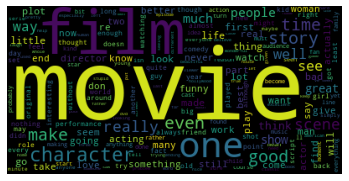

In [ ]:
# Generating Word Cloud
corp_str = str(corpus)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**TF- IDF MODEL**


In [ ]:
## creating TF- IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1]
y = pd.get_dummies(y, drop_first=True)

In [ ]:
X.shape

(2000, 1500)

In [ ]:
y.value_counts()

positive
1           1005
0            995
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=99, stratify = y)

In [ ]:
y_train.value_counts()

positive
1           703
0           697
dtype: int64

In [ ]:
y_test.value_counts()

positive
1           302
0           298
dtype: int64

In [ ]:
X_train.shape


(1400, 1500)

In [ ]:
X_test.shape

(600, 1500)

**KNN MODEL**

In [ ]:
## 1. KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit( X_train, y_train )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred_prob = knn.predict_proba(X_test)

In [ ]:
y_pred_prob = y_pred_prob[:,1]

In [ ]:
y_pred_prob

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[220  78]
 [ 92 210]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       298
           1       0.73      0.70      0.71       302

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600

0.7166666666666667
0.7831459175963376


**Logistic Regression**

In [ ]:
## 2. Logistic Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
roc_auc_score(y_test, y_pred_prob)

[[252  46]
 [ 57 245]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       298
           1       0.84      0.81      0.83       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

0.8283333333333334


0.9137850571136495

**SGD Classifier**

In [ ]:
###  3. SGD Classifier

from sklearn.linear_model import SGDClassifier
sgdClass = SGDClassifier(loss='log', random_state=99)
sgdClass.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=99, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
y_pred = sgdClass.predict(X_test)
y_pred_prob = sgdClass.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[250  48]
 [ 57 245]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       298
           1       0.84      0.81      0.82       302

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.82       600
weighted avg       0.83      0.82      0.82       600

0.825
0.9090515134005955


In [ ]:
# SGD Tunning
from sklearn.model_selection import GridSearchCV

eta_range = np.linspace(0.001,1.2)

sgdClass = SGDClassifier(loss='log',learning_rate='constant',
                         eta0=0.00001,random_state=2019)
parameters = dict( eta0 = eta_range )
svmGrid = GridSearchCV(sgdClass, param_grid=parameters, cv=5,
                       scoring='roc_auc')
svmGrid.fit(X, y)




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=1e-05,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='constant', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=2019, shuffle=True, tol=0.001,
                                     validation_fraction=0.1...
       7.84020408e-01, 8.08489796e-01, 8.32959184e-01, 8.57428571e-01,
       8.81897959e-01, 9.06367347e-01, 9.30836735e-01, 9.55306122e-01,
       9.79775510e-01, 1.00424490e+00, 1.02871429e+00, 1.05318367e+00,
       1.07765306e+00, 1.10212245e+00, 1.12659184e+00, 1.15106122e+00,
       1.17553061e+00, 1.20000000

In [ ]:
print(svmGrid.best_params_)

{'eta0': 0.025469387755102043}


In [ ]:
print(svmGrid.best_score_)

0.9210030250756269


**SVM**

In [ ]:
##  4. SVM
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability = True,kernel='linear')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
fitSVC = svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = fitSVC.predict(X_test)
y_pred_prob = fitSVC.predict_proba(X_test)[:,1]

In [ ]:
y_pred

In [ ]:
y_pred_prob

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[250  48]
 [ 57 245]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       298
           1       0.84      0.81      0.82       302

    accuracy                           0.82       600
   macro avg       0.83      0.83      0.82       600
weighted avg       0.83      0.82      0.82       600

0.825
0.9025845593137474


In [ ]:
### SVM Tunning
C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
# OR
C_range = np.linspace(0.001,2)
param_grid = dict( C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=99)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(SVC(probability=True,kernel='linear'),
                        random_state=99,param_distributions=param_grid ,
                        cv=kfold,scoring='roc_auc',n_iter=15)

rcv.fit( X , y)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n...
       1.30646939e+00, 1.34726531e+00, 1.38806122e+00, 1.42885714e+00,
       1.46965306e+00, 1.51044898e+00, 1.55124490e+00, 1.59204082e+00,
       1.63283673e+00, 1.67363265e+00, 1.71442857e+00, 1.75522449e+00,
       1.79602041e+00, 1.83681633e+00, 1.87761224e+00, 1.91840816e+00,
       1.95920408e+00, 2.00000000e+00])},
                   pre_dispatch='2*n_jobs', random_state=99, refit=True,
     

In [ ]:
print(rcv.best_params_)

print(rcv.best_score_)  

print(rcv.best_estimator_)

{'C': 0.4497551020408163}
0.9179379484487112
SVC(C=0.4497551020408163, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


**Gaussian Naive Bayes**

In [ ]:
### 5. Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gaussian.predict(X_test)

In [ ]:
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]

In [ ]:
############## Model Evaluation ##############
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[220  78]
 [ 77 225]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       298
           1       0.74      0.75      0.74       302

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600

0.7416666666666667


0.7871294279745766

**Decision Tree**

In [ ]:
###  6. DEcision Tree Classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=2020)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [ ]:
y_pred_prob

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[224  74]
 [115 187]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       298
           1       0.72      0.62      0.66       302

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.68       600
weighted avg       0.69      0.69      0.68       600

0.685
0.6854415751811193


In [ ]:
#######################Grid Search CV###########################
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2018)

cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [ ]:
cv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2018,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
       

In [ ]:
print(cv.best_params_)

print(cv.best_score_)

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.7445561139028476


**Random Forest**

In [ ]:
###  7. Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(random_state=99,
                                  n_estimators=1000,oob_score=True)

In [ ]:
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=99, verbose=0,
                       warm_start=False)

In [ ]:
model_rf.fit( X_train , y_train )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=99, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[247  51]
 [ 56 246]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       298
           1       0.83      0.81      0.82       302

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

0.8216666666666667
0.904584648206587


In [ ]:
#################### Grid Search CV ################################
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
parameters = {'max_features': np.arange(1,100)}

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, random_state=99)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
model_rf = RandomForestClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [ ]:
cv.fit( X , y )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
results_df = pd.DataFrame(cv.cv_results_  )

In [ ]:
results_df.head()

In [ ]:
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

{'max_features': 13}
0.899504937272713
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1211,
                       verbose=0, warm_start=False)


**Bagging Classifier**

In [ ]:
### 8. Bagging 
from sklearn.ensemble import BaggingClassifier  

In [ ]:
Bag_Cls = BaggingClassifier(base_estimator = LogisticRegression() ,
                             random_state=99,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=50,max_samples=X_train.shape[0])

In [ ]:
Bag_Cls.fit( X_train , y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1500,
                  max_samples=1400, n_estimators=50, n_jobs=None,
                  oob_score=True, random_state=99, 

In [ ]:
y_pred = Bag_Cls.predict(X_test)

In [ ]:
y_pred_prob = Bag_Cls.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[253  45]
 [ 55 247]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       298
           1       0.85      0.82      0.83       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

0.8333333333333334
0.9124294413085025


**Voting Classifier**

In [ ]:
### 9. Voting Classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
logreg = LogisticRegression(random_state=99)
rf = RandomForestClassifier(random_state=99, n_estimators=1000,oob_score=True)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
Voting = VotingClassifier(estimators=[('LR', logreg),
                                      ('RF', rf),
                                      ('KNN',knn)],voting='soft')

In [ ]:
Voting.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=99,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
y_pred = Voting.predict(X_test)

In [ ]:
y_pred_prob = Voting.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[253  45]
 [ 64 238]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       298
           1       0.84      0.79      0.81       302

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

0.8183333333333334
0.904940219565314


**Gradient Boosting**

In [ ]:
###  10. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=99)

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=99, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred_prob = Voting.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[224  74]
 [ 57 245]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       298
           1       0.77      0.81      0.79       302

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600

0.7816666666666666
0.904940219565314


In [ ]:
####### Tuning with Randomized Grid Search ######################

lr_range = np.linspace(0.001,1)
#n_est_range = np.arange(10,200,10)

depth_range = [3,4,5,6]
minsplit_range = [5,10,20]
minleaf_range = [5,10,15]

parameters = dict(learning_rate=lr_range,
                  #n_estimators=n_est_range,
                  max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)


In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, random_state=96)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = GradientBoostingClassifier(random_state=1200)
cv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='roc_auc',random_state=96,
                  n_iter=10)

In [ ]:
cv.fit(X,y)

In [ ]:
print(cv.best_params_)
print(cv.best_score_)

{'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 5, 'learning_rate': 0.30681632653061225}
0.882981943556342


**XGB Classifier**

In [ ]:
### 11. XGB Classifier
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(random_state=2000)

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2000,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_prob))

[[223  75]
 [ 61 241]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       298
           1       0.76      0.80      0.78       302

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

0.7733333333333333
0.852926796746522


In [ ]:
##################Tunning using Randomized Search CV ############
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
depth_range = [3,4,5,6]

parameters = dict(learning_rate=lr_range,
                  max_depth=depth_range)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, random_state=96)

clf = XGBClassifier(random_state=96)
rcv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='roc_auc',n_iter=10,random_state=96)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
rcv.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=96, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=96, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
     

In [ ]:
df_rcv = pd.DataFrame(rcv.cv_results_)

In [ ]:
df_rcv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.653232,0.005832,0.012855,0.000215,6,0.01,"{'max_depth': 6, 'learning_rate': 0.01}",0.803309,0.827486,0.806214,0.812336,0.010778,7
1,3.613562,0.001976,0.011884,0.000150,3,0.2,"{'max_depth': 3, 'learning_rate': 0.2}",0.864723,0.881815,0.863106,0.869881,0.008464,4
2,3.602411,0.005490,0.011793,0.000066,3,0.001,"{'max_depth': 3, 'learning_rate': 0.001}",0.707103,0.704900,0.674221,0.695408,0.015008,10
3,5.596667,0.016086,0.012539,0.000073,5,0.5,"{'max_depth': 5, 'learning_rate': 0.5}",0.868315,0.885201,0.869883,0.874466,0.007617,3
4,3.595194,0.012630,0.011915,0.000089,3,0.6,"{'max_depth': 3, 'learning_rate': 0.6}",0.860538,0.887889,0.877107,0.875178,0.011249,2


In [ ]:
print(rcv.best_params_)

print(rcv.best_score_)

{'max_depth': 6, 'learning_rate': 0.2}
0.8787832938825691


**Stacking Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.svm import SVC
svc = SVC(probability = True,kernel='rbf')

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

In [ ]:
from sklearn.ensemble import StackingClassifier
models_considered = [('Logistic Regression', logreg),
                     ('SVM', svc),('Naive Bayes',gaussian) ]
                     

from xgboost import XGBClassifier
clf = XGBClassifier(random_state=96)

In [ ]:
stack = StackingClassifier(estimators = models_considered,
                           final_estimator=clf,stack_method="predict_proba")

In [ ]:
stack.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=None,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                SVC(C=1.0, break_ties=False, cache_size=200,
       

In [ ]:
y_pred_prob = stack.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.9066014045068669

In [ ]:
######## Include the original data along with predicted variables #####

stack = StackingClassifier(estimators = models_considered,
                           final_estimator=clf,
                           stack_method="predict_proba",
                           passthrough=True)

In [ ]:
stack.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=None,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('SVM',
                                SVC(C=1.0, break_ties=False, cache_size=200,
       

In [ ]:
y_pred_prob = stack.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.911246055380239

**CatBoost**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_cb = CatBoostClassifier(task_type='GPU', iterations=100, random_state=96, eval_metric='AUC')

In [ ]:
model_cb.fit(X_train, y_train)

Learning rate set to 0.260457
0:	learn: 0.7254521	total: 19.4ms	remaining: 1.92s
1:	learn: 0.7626038	total: 38.6ms	remaining: 1.89s
2:	learn: 0.8150956	total: 56.7ms	remaining: 1.83s
3:	learn: 0.8414430	total: 75ms	remaining: 1.8s
4:	learn: 0.8608097	total: 93.3ms	remaining: 1.77s
5:	learn: 0.8787110	total: 112ms	remaining: 1.75s
6:	learn: 0.8872163	total: 129ms	remaining: 1.72s
7:	learn: 0.8960440	total: 148ms	remaining: 1.7s
8:	learn: 0.9077013	total: 166ms	remaining: 1.68s
9:	learn: 0.9120035	total: 182ms	remaining: 1.64s
10:	learn: 0.9179087	total: 198ms	remaining: 1.6s
11:	learn: 0.9205792	total: 226ms	remaining: 1.66s
12:	learn: 0.9263191	total: 241ms	remaining: 1.61s
13:	learn: 0.9303028	total: 256ms	remaining: 1.57s
14:	learn: 0.9346396	total: 270ms	remaining: 1.53s
15:	learn: 0.9403907	total: 286ms	remaining: 1.5s
16:	learn: 0.9455623	total: 300ms	remaining: 1.46s
17:	learn: 0.9505756	total: 314ms	remaining: 1.43s
18:	learn: 0.9536920	total: 329ms	remaining: 1.4s
19:	learn: 0.

In [ ]:
y_pred = model_cb.predict(X_test)

In [ ]:
y_pred_prob = model_cb.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.8596048713276147